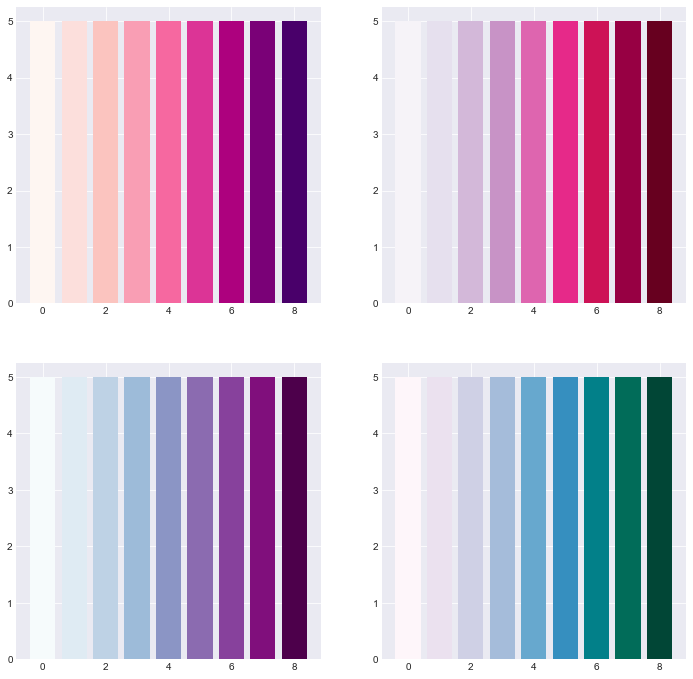

In [17]:
#colorbrewer colors

import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset
height = [5]*9
bars = ('1', '2', '3', '4', '5', '6', '7', '8', '9')
y_pos = np.arange(len(bars))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

#in HEX
# colors1 = ['#fff7f3', '#fde0dd', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', 
#           '#ae017e', '#7a0177', '#49006a']
# colors2 = ['#f7f4f9', '#e7e1ef', '#d4b9da', '#c994c7', '#df65b0', '#e7298a', 
#            '#ce1256', '#980043', '#67001f']
# colors3 = ['#f7fcfd', '#e0ecf4', '#bfd3e6', '#9ebcda', '#8c96c6', '#8c6bb1',
#             '#88419d', '#810f7c', '#4d004b']
# colors4 = ['#fff7fb', '#ece2f0', '#d0d1e6', '#a6bddb', '#67a9cf', '#3690c0',
#             '#02818a', '#016c59', '#014636']

#in RGB
colors1 = [(255,247,243), (253,224,221), (252,197,192), (250,159,181), (247,104,161),
            (221,52,151), (174,1,126), (122,1,119), (73,0,106)]
colors2 = [(247,244,249), (231,225,239), (212,185,218), (201,148,199), (223,101,176),
            (231,41,138), (206,18,86), (152,0,67), (103,0,31)]
colors3 = [(247,252,253), (224,236,244), (191,211,230), (158,188,218), (140,150,198), 
            (140,107,177), (136,65,157), (129,15,124), (77,0,75)]
colors4 = [(255,247,251), (236,226,240), (208,209,230), (166,189,219), (103,169,207), 
           (54,144,192), (2,129,138), (1,108,89), (1,70,54)]

for ax, color in zip(axs.flat, [colors1, colors2, colors3, colors4]):
    color = np.array(color)/256
    ax.bar(y_pos, height, color=color)
    ax.set_xticks(y_pos, bars)
    
plt.show()


Text(0, 0.5, 'Score')

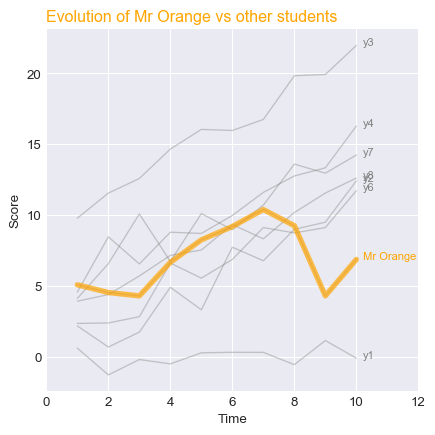

In [5]:
#make one line highlighted 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })
 
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# multiple line plot
for column in df.drop('x', axis=1):
   plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
 
####### HOW TO HIGHLIGHT: bigger and more opaque########    
# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
########################################################
 
# Change xlim
plt.xlim(0,12)
 
# Let's annotate the plot
num=0
for i in df.values[9][1:]:
   num+=1
   name=list(df)[num]
   if name != 'y5':
      plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')
 
# And add a special annotation for the group we are interested in
plt.text(10.2, df.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
# Add titles
plt.title("Evolution of Mr Orange vs other students", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


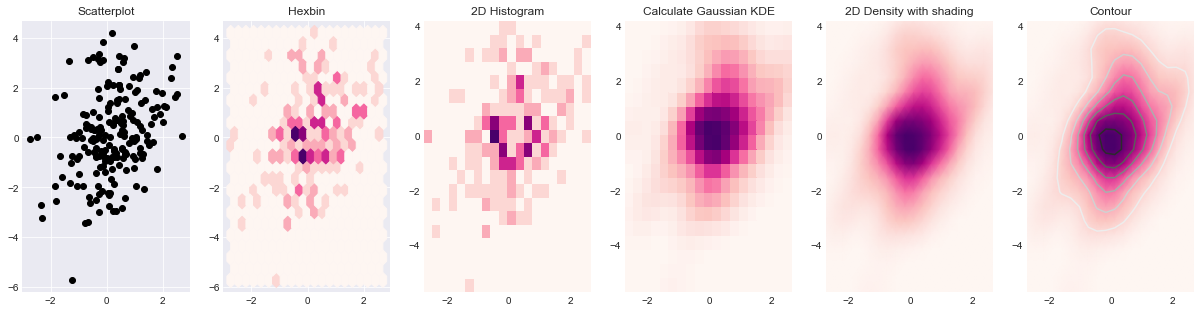

In [19]:
#different types of scatter/contour/density plots

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

#create colormap: 
cm = LinearSegmentedColormap.from_list('Keri', np.array(colors1)/256, N=100)
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=cm)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=cm)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cm)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=cm)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=cm)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

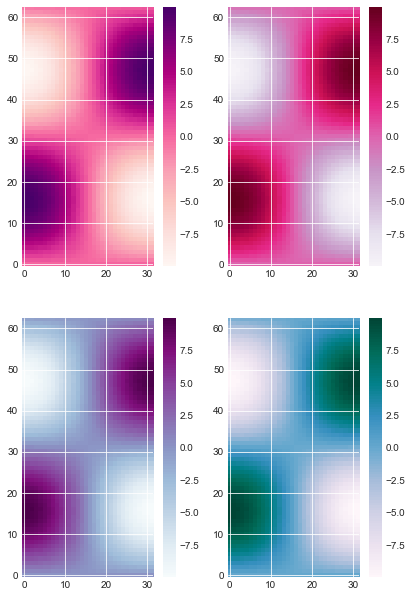

In [13]:
#make your own colormap
from matplotlib.colors import LinearSegmentedColormap

#make fake data:
x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for ax, color in zip(axs.ravel(), [colors1, colors2, colors3, colors4]):
    
    color = np.array(color)/256
    # Create the colormap
    cm = LinearSegmentedColormap.from_list('Keri', color, N=100)
    
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    fig.colorbar(im, ax=ax)